In [1]:
#Intro


In [85]:
#imports (use pip install 'package')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
#import geocoder
#import folium
#from haversine import haversine
% matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import datetime

In [86]:
#Load the csv file for green taxis August 2013 into a pandas dataframe
green = pd.read_csv('green_tripdata_2013-08.csv')
df_green = pd.DataFrame(green)

#Load the csv file for NYC 2012-2013 traffic into a pandas datafram
traffic = 'Traffic_Volume_Counts__2012-2013_.csv'
df_traffic = pd.read_csv(traffic)

In [87]:
#green taxi data before cleaning
df_green.head(n=10)

VendorID lpep_pickup_datetime  \
2 2013-08-01 08:14:37  2013-08-01 09:09:06                    N   
  2013-08-01 09:13:00  2013-08-01 11:38:00                    N   
  2013-08-01 09:48:00  2013-08-01 09:49:00                    N   
  2013-08-01 10:38:35  2013-08-01 10:38:51                    N   
  2013-08-01 11:51:45  2013-08-01 12:03:52                    N   
  2013-08-01 14:33:39  2013-08-01 15:49:00                    N   
  2013-08-01 17:19:00  2013-08-01 17:19:00                    N   
  2013-08-01 17:22:00  2013-08-01 17:22:00                    N   
  2013-08-01 17:24:00  2013-08-01 17:25:00                    N   
  2013-08-01 19:21:09  2013-08-01 19:22:30                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2013-08-01 08:14:37                      1            0.000000    0.000000   
  2013-08-01 09:13:00                      1            0.000000    0.000000   
  2013-08-01 09:48:00                      5            0.000000    0.000000   
  2013-08-01 10:38:35                      1            0.000000    0.000000   
  2013-08-01 11:51:45                      1            0.000000    0.000000   
  2013-08-01 14:33:39                      1            0.000000    0.000000   
  2013-08-01 17:19:00                      1            0.000000    0.000000   
  2013-08-01 17:22:00                      1          -73.937767   40.758480   
  2013-08-01 17:24:00                      1          -73.937927   40.757843   
  2013-08-01 19:21:09                      1            0.000000    0.000000   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2013-08-01 08:14:37          0.000000         0.000000                  1   
  2013-08-01 09:13:00          0.000000         0.000000                  2   
  2013-08-01 09:48:00          0.000000         0.000000                  1   
  2013-08-01 10:38:35          0.000000         0.000000                  1   
  2013-08-01 11:51:45          0.000000         0.000000                  1   
  2013-08-01 14:33:39          0.000000         0.000000                  1   
  2013-08-01 17:19:00          0.000000         0.000000                  1   
  2013-08-01 17:22:00        -73.937767        40.758480                  1   
  2013-08-01 17:24:00        -73.937927        40.757843                  1   
  2013-08-01 19:21:09          0.000000         0.000000                  5   

                       Dropoff_latitude  Passenger_count  Trip_distance  \
2 2013-08-01 08:14:37               0.0            21.25            0.0   
  2013-08-01 09:13:00               0.0            74.50            0.0   
  2013-08-01 09:48:00               0.0             1.00            0.1   
  2013-08-01 10:38:35               0.0             3.25            0.0   
  2013-08-01 11:51:45               0.0             8.50            0.0   
  2013-08-01 14:33:39               0.0             9.00            0.0   
  2013-08-01 17:19:00               0.0             2.50            1.0   
  2013-08-01 17:22:00               0.0             2.50            1.0   
  2013-08-01 17:24:00               0.0             2.50            1.0   
  2013-08-01 19:21:09               0.0             3.00            1.0   

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2013-08-01 08:14:37          0.0    0.0     0.00         NaN         21.25   
  2013-08-01 09:13:00          0.5    0.0     0.00         NaN         75.00   
  2013-08-01 09:48:00          0.0    0.0     1.00         NaN          2.10   
  2013-08-01 10:38:35          0.0    0.0     0.00         NaN          3.25   
  2013-08-01 11:51:45          0.5    0.0     0.00         NaN          9.00   
  2013-08-01 14:33:39          0.5    0.0     0.00         NaN          9.50   
  2013-08-01 17:19:00          0.5    0.0     0.00         NaN          4.00   
  2013-08-01 17:22:00          0.5    0.0     5.33         NaN          9.33   

In [88]:
#2012-2013 NYC traffic before cleaning
df_traffic.head(n=10)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154
7,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/09/2013,110,73,46.0,...,379,406,330,402,387,336,254,201,191,174
8,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/10/2013,114,77,58.0,...,315,297,320,257,246,221,214,147,121,85
9,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/11/2013,38,30,15.0,...,434,433,438,478,433,365,228,189,136,75


In [89]:
#cleaning green taxi data

#drop rows without location data
df_green = df_green[df_green.Pickup_longitude != 0]

#drop useless columns
df_green.drop(df_green.columns[[1,2,7,8,10,11,12,13,14,15,16,17,18,19]],axis = 1,inplace = True)

#rename columns because of some extra commas in the csv
df_green.columns = ['Dropoff_time','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance']

#shift the row indices to a new column
df_green.index.name = 'Pickup_time'
df_green.reset_index(inplace=True)

#drop useless level 0 column created from shifting the indices
del df_green['level_0']

#rename level_1 to pickup time
df_green.rename(columns={'level_1': 'Pickup_time'}, inplace=True)

#delete rows if pickup and drop off are the same
df_green = df_green[df_green['Pickup_longitude'] != df_green['Dropoff_longitude']]
df_green = df_green[df_green['Pickup_latitude'] != df_green['Dropoff_latitude']]


In [90]:
#split columns containing both date and time into separate columns with date and time

#split Pickup_time column into date and time columns
df_tempPickup = df_green['Pickup_time'].apply(lambda x: pd.Series(x.split(' ')))
#split Dropoff_time column into date and time columns
df_tempDropoff = df_green['Dropoff_time'].apply(lambda x: pd.Series(x.split(' ')))

#rename columns to pickup and dropoff date and time
df_tempPickup.columns = ['Pickup Date', 'Pickup Time']
df_tempDropoff.columns = ['Dropoff Date', 'Dropoff Time']

#drop Pickup_time and Dropoff_time columns
df_green = df_green.drop(['Dropoff_time'], axis = 1)
df_green = df_green.drop(['Pickup_time'], axis = 1)

#concatenate the pickup, dropoff, and green taxi dataframes
df_green = pd.concat([df_tempPickup, df_tempDropoff, df_green], axis=1)

In [91]:
#cleaned green taxi data: first 10 entries as sample to view
df_green.head(n=10)

,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance
2,2013-08-05,11:31:47,2013-08-05,11:34:01,-115.179100,36.137096,-115.179337,36.136684,1.00
3,2013-08-05,11:31:47,2013-08-05,11:32:16,-115.179100,36.137096,-115.179337,36.136684,1.20
5,2013-08-05,11:53:27,2013-08-05,11:53:43,-115.179337,36.136753,-115.179276,36.136826,1.00
7,2013-08-06,10:33:07,2013-08-06,10:33:46,-76.979668,38.927082,-76.979713,38.927326,3.25
8,2013-08-06,13:26:34,2013-08-06,13:26:57,-73.937691,40.758419,-73.937790,40.758358,3.30
9,2013-08-06,13:27:53,2013-08-06,13:28:08,-73.937805,40.758396,-73.937775,40.758450,3.30
10,2013-08-06,13:29:17,2013-08-06,13:29:52,-73.937744,40.758415,-73.937759,40.758389,3.50
11,2013-08-06,13:30:55,2013-08-06,13:31:12,-73.937775,40.758366,-73.937790,40.758350,3.30
12,2013-08-07,10:22:30,2013-08-07,10:23:24,-76.979950,38.927292,-76.979591,38.927288,3.52
13,2013-08-07,10:24:53,2013-08-07,10:28:16,-76.979668,38.927311,-76.979889,38.927174,3.25


In [92]:
#clean NYC 2012-2013 traffic data

#convert dataframe columns to a list
cols = list(df_traffic)

#Rearranging columns
cols.insert(0, cols.pop(cols.index('Date')))

#Roadway names and intersections are cluttering the date, moving to the back, 
#keeping segment ID so we know what are the same roads
cols.insert(31, cols.pop(cols.index('Roadway Name')))
cols.insert(31, cols.pop(cols.index('From')))
cols.insert(31, cols.pop(cols.index('To')))

#Don't know how to use 'ID'  so moving it to the back
cols.insert(31, cols.pop(cols.index('ID')))
cols.insert(4, 'Total Traffic')
cols.insert(1, 'Weekday')

#creating list of times 
Times = cols[7:31]

#Translates dates into weekdays
for i, row in df_traffic.iterrows():
    df_traffic.loc[i, 'Weekday'] = datetime.datetime.strptime(df_traffic.loc[i, 'Date'], '%m/%d/%Y').strftime('%A')
df_traffic = df_traffic.ix[:, cols]
#column for total traffic of the day
df_traffic['Total Traffic'] = df_traffic[Times].sum(axis=1)

In [93]:
#cleaned traffic data: first 10 entries as sample to view
df_traffic.head(n=10)

,Date,Weekday,Segment ID,Direction,12:00-1:00 AM,Total Traffic,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,...,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Roadway Name,From,To,ID
0,02/02/2013,Saturday,2153,NB,106,5391.0,74,45.0,29.0,29,...,379,329,249,197,187,169,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
1,02/03/2013,Sunday,2153,NB,109,4085.0,74,55.0,37.0,26,...,242,217,210,144,125,79,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
2,02/04/2013,Monday,2153,NB,36,5867.0,28,11.0,16.0,32,...,425,358,224,185,132,74,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
3,02/05/2013,Tuesday,2153,NB,42,6172.0,28,16.0,12.0,34,...,446,424,305,219,171,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
4,02/06/2013,Wednesday,2153,NB,35,5597.0,38,12.0,14.0,31,...,401,338,236,186,123,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
5,02/07/2013,Thursday,2153,NB,33,5302.0,26,14.0,22.0,31,...,356,339,275,225,169,104,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
6,02/08/2013,Friday,2153,NB,35,6448.0,28,18.0,14.0,34,...,531,393,351,276,242,154,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
7,02/09/2013,Saturday,2153,NB,110,5504.0,73,46.0,32.0,29,...,387,336,254,201,191,174,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
8,02/10/2013,Sunday,2153,NB,114,4171.0,77,58.0,40.0,28,...,246,221,214,147,121,85,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
9,02/11/2013,Monday,2153,NB,38,5989.0,30,15.0,19.0,34,...,433,365,228,189,136,75,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1


#convert street names to coordinates for NYC 2012-2013 traffic data (don't run this cell as it takes a lot of time and we have limited queries to the API)
#we import the new dataframe in the next cell

# Generate empty columns for GPS coordinates 
df_traffic['From Lat'] = np.nan
df_traffic['From Lon'] = np.nan
df_traffic['To Lat'] = np.nan
df_traffic['To Lon'] = np.nan

# Generate gps coordinates for the From intersection 
for i in df_traffic.index:
    # Concatenate the street names as an intersection to find the coords
    road = (df_traffic.ix[i,'Roadway Name']) + ' & ' + (df_traffic.ix[i,'From']) + ', NY'
    # Send the address 
    # If the address isn't found then the coordinates column remains as NaN 
    g = geocoder.google(road)
    df_traffic.set_value(i, 'From Lat', g.lat)
    df_traffic.set_value(i, 'From Lon', g.lng)
    
#Drop all the columns where the geocoding failed to obtain coordinates 
# Reindex 

df_traffic = df_traffic.dropna()
df_traffic = df_traffic.reset_index(drop=True)

In [94]:
#import the dataframe generated from the above cell
traffic = 'traffic_count_coordinates.csv'
df_traffic = pd.read_csv(traffic)
#clean the data with some renaming and deleting useless columns
del df_traffic['Unnamed: 0']
df_traffic.rename(columns={'Segment ID': 'Total Traffic'}, inplace=True)



In [95]:
#cleaned NYC 2012-2013 traffic data with coordinates and total traffic
#convert the cleaned data to csv for use elsewhere
df_traffic.to_csv('Cleaned_Traffic_Count_Coordinates.csv')
df_traffic


,Total Traffic,Roadway Name,From,To,From Lat,From Lon,To Lat,To Lon
0,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,40.543227,-74.197284,40.542538,-74.197009
1,6644,RICHMOND HILL ROAD,EDINBORO ROAD,FOREST HILL ROAD,40.581193,-74.153053,40.580614,-74.152527
2,7564,MORLEY AVENUE,DALTON AVENUE,EBONY STREET,40.575439,-74.126911,40.575720,-74.126045
3,11599,OCEAN TERRACE,BUTTERWORTH AVENUE,COVERLY AVENUE,40.603704,-74.105791,40.603357,-74.104744
4,12945,LITTLE CLOVE RD,CAYUGA AVENUE,RENWICK AVENUE,40.610864,-74.100428,40.611177,-74.105598
5,13133,CLOVE RD,HOWARD AVENUE,LITTLE CLOVE ROAD,40.612444,-74.099294,40.611420,-74.098623
6,14602,HYLAN BOULEVARD,FINGERBOARD ROAD,RODERICK AVENUE,40.601470,-74.072462,40.602224,-74.073584
7,17319,86 STREET,7 AVENUE,14 AVENUE,40.618472,-74.021214,40.612735,-74.011712
8,17652,4 AVENUE,68 STREET,SENATOR STREET,40.635318,-74.023235,40.636111,-74.022913
9,18635,CROPSEY AVE,BAY 22nd ST,BAY 23rd ST,40.601020,-74.004363,40.600625,-74.003594


In [96]:
#scatterplot for green taxi data dropoff and pickup longitutdes and latitudes

#create dataframe with just coordinate data 
df_greenCoordinates = df_green
df_greenCoordinates.drop(df_greenCoordinates.columns[[0,1,2,3,8]],axis = 1, inplace = True)

AttributeError: Unknown property width

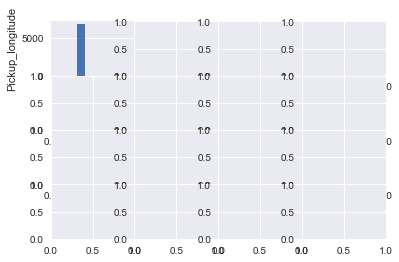

In [97]:
scatter = pd.scatter_matrix(df_greenCoordinates, width = 1000, height = 1000)

In [ ]:
#conclusion